# KNN을 이용한 농구선수 포지션 예측 

In [1]:
import pickle

In [2]:
# 데이터 불러오기 
path = './output/basketball_train.pkl'
with open( path , 'rb') as train_data:
    train = pickle.load(train_data)
    
path = './output/basketball_test.pkl'
with open( path , 'rb') as test_data:
    test = pickle.load(test_data)

In [3]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

## 1. 최적의 k 찾기 (교차검증) 

In [5]:
max_k_range = train.shape[0]//2
k_list=list()

for i in range( 3 ,max_k_range, 2 ):
    k_list.append(i)

In [6]:
cross_validation_score = list() 
x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

In [7]:
for k in k_list:
    
    knn    = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring = 'accuracy')
    
    cross_validation_score.append(scores.mean())

In [8]:
y_train.values.ravel()

array(['SG', 'C', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'SG', 'C', 'C',
       'C', 'SG', 'SG', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'SG', 'C', 'C',
       'SG', 'C', 'SG', 'C', 'C', 'SG', 'SG', 'SG', 'SG', 'C', 'SG', 'SG',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C', 'SG', 'C', 'C', 'C',
       'SG', 'SG', 'SG', 'C', 'C', 'C', 'SG', 'C', 'SG', 'C', 'SG', 'SG',
       'C', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'C', 'C',
       'C', 'SG', 'SG', 'SG', 'C', 'C', 'SG', 'C'], dtype=object)

In [9]:
# cross_validation_score

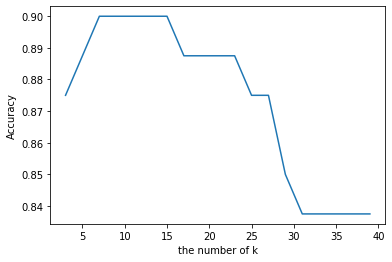

In [10]:
# 시각화 
plt.plot(k_list, cross_validation_score)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [11]:
cvs = cross_validation_score
k   = k_list[cvs.index(max(cross_validation_score))]

print("The best number of k : " + str(k))

The best number of k : 7


## 2개의 특징으로 예측하기(3점슛, 블로킹)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
knn     = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P','BLK']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())
x_test = test[['3P','BLK']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

In [14]:
comparison = pd.DataFrame({'prediction':pred , 'ground_truth': y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,C,C
2,C,C
3,C,C
4,SG,SG
...,...,...
75,SG,SG
76,C,C
77,C,C
78,SG,SG


In [15]:
# 2개의 특징으로 예측
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.95


### 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [16]:
knn     = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P','BLK', 'TRB']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())
x_test = test[['3P','BLK', 'TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

In [17]:
comparison = pd.DataFrame({'prediction':pred , 'ground_truth': y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,C,C
2,C,C
3,C,C
4,SG,SG
...,...,...
75,SG,SG
76,C,C
77,C,C
78,SG,SG


In [18]:
# 3개의 특징으로 예측
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.9
